<a href="https://colab.research.google.com/github/RafaelTorresCH/Signal-theory/blob/main/class%20notebooks/NUEVA_BASE_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#https://www.kaggle.com/datasets/amirberenji/electric-motor-vibrations-dataset?resource=download

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amirberenji/electric-motor-vibrations-dataset")

print("Path to dataset files:", path)

100%|██████████| 38.4M/38.4M [00:00<00:00, 99.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/amirberenji/electric-motor-vibrations-dataset/versions/1


In [2]:
from pathlib import Path
import pandas as pd

# Ruta base (viene del kagglehub)
base = Path(path)

# Archivo 15 (motor sano con ruido externo)
f15 = base / "15 - m1_with_m2_mechanicaly_umbalanced_on_background_half_speed.csv"
if not f15.exists():  # por si el nombre no tiene el prefijo numérico
    f15 = base / "m1_with_m2_mechanicaly_umbalanced_on_background_half_speed.csv"

# Cargar a DataFrame
df15 = pd.read_csv(f15)

print("Archivo leído:", f15.name)
print("Shape:", df15.shape)
print("Columnas:", list(df15.columns))
df15.head()


Archivo leído: 15 - m1_with_m2_mechanicaly_umbalanced_on_background_half_speed.csv
Shape: (102111, 4)
Columnas: ['Timestamp', 'AccX', 'AccY', 'AccZ']


,Timestamp,AccX,AccY,AccZ
0,271091720,-1471,-463,14658
1,271093612,-780,-551,16844
2,271095516,2473,-140,14367
3,271097404,676,516,18739
4,271099296,1311,197,14603


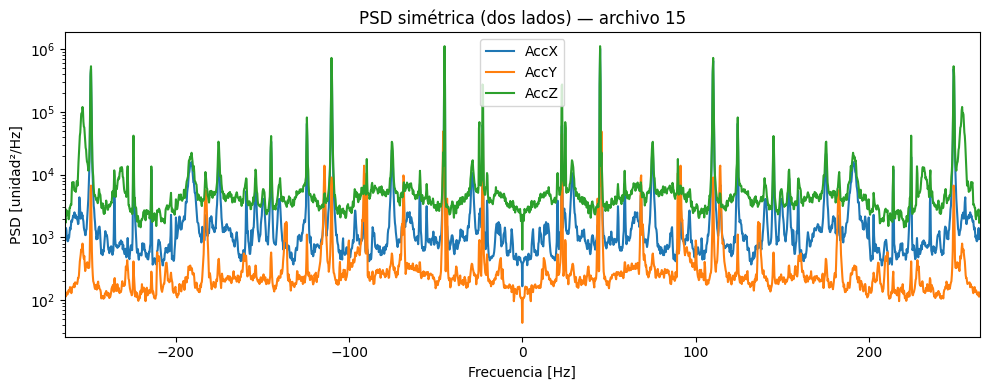

In [3]:
import numpy as np, matplotlib.pyplot as plt
from scipy.signal import welch
from numpy.fft import fftshift

def estimate_fs(ts):
    ts = ts.astype(float).to_numpy()
    dt = np.median(np.diff(ts)[1:])
    for u,k in {"s":1,"ms":1e-3,"us":1e-6,"ns":1e-9}.items():
        fs = 1/(dt*k)
        if 500 <= fs <= 200_000: return fs
    return 1/dt  # fallback

fs = estimate_fs(df15["Timestamp"])
cols = ["AccX","AccY","AccZ"]
params = dict(window="hann", nperseg=2048, noverlap=1024, nfft=2048,
              detrend="constant", scaling="density", return_onesided=False)

plt.figure(figsize=(10,4))
for c in cols:
    x = df15[c].astype(float).to_numpy()
    x = x - x.mean()
    f, Pxx = welch(x, fs=fs, **params)      # dos lados
    f, Pxx = fftshift(f), fftshift(Pxx)      # centrar en 0 Hz
    plt.semilogy(f, Pxx, label=c)

plt.xlim(-fs/2, fs/2)
plt.xlabel("Frecuencia [Hz]"); plt.ylabel("PSD [unidad²/Hz]")
plt.title("PSD simétrica (dos lados) — archivo 15")
plt.legend(); plt.tight_layout(); plt.show()
